# Stock Backtesting Framework - Comprehensive Demo

This notebook demonstrates all the functionalities of the stock backtesting framework, including:

1. **Flexible Data Sources** - Pluggable data source architecture supporting multiple providers
2. **Data Fetching** - Retrieving historical stock data with built-in validation and normalization
3. **Strategy Implementation** - Various trading strategies (Moving Average, RSI, MACD)
4. **Backtesting Engine** - Running strategies against historical data
5. **Trading Costs & Taxes** - Realistic cost modeling and tax calculations
6. **Performance Analysis** - Comprehensive metrics and analysis
7. **Visualization** - Interactive charts and performance graphs
8. **Strategy Comparison** - Comparing multiple strategies
9. **Custom Strategy Creation** - Building your own trading strategies

## 🆕 New Features

- **Flexible Data Source Architecture**: Easy switching between data providers (Yahoo Finance, Alpha Vantage, IEX Cloud, etc.)
- **Configuration-Driven**: Data source selection via configuration files
- **Backward Compatible**: All existing code continues to work unchanged
- **Enhanced Error Handling**: Robust validation and error reporting

---


## Setup and Imports

First, let's import all necessary libraries and set up the environment.


In [ ]:
# Standard library imports
import sys
import os
import warnings
from datetime import datetime, date
import logging

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Add the project root to Python path
project_root = os.path.dirname(os.path.abspath('.'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Import our framework modules
from src.data.data_fetcher import DataFetcher
from src.data.data_source_factory import DataSourceFactory
from src.strategies.moving_average import MovingAverageStrategy
from src.strategies.rsi_strategy import RSIStrategy
from src.strategies.macd_strategy import MACDStrategy
from src.backtesting.engine import BacktestEngine, BacktestResults
from src.visualization.plots import BacktestPlots
from config.settings import get_setting

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("✅ All imports successful!")
print(f"📁 Project root: {project_root}")
print(f"🐍 Python version: {sys.version}")


✅ All imports successful!
📁 Project root: c:\projects
🐍 Python version: 3.9.23 | packaged by conda-forge | (main, Jun  4 2025, 17:49:16) [MSC v.1929 64 bit (AMD64)]


## 1. Data Fetching

Let's start by fetching historical data for multiple stocks to demonstrate the data fetching capabilities.


In [2]:
# Initialize data fetcher
fetcher = DataFetcher()

# Define symbols to fetch
symbols = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN']
start_date = '2020-01-01'
end_date = '2023-12-31'

print(f"📊 Fetching data for {len(symbols)} symbols from {start_date} to {end_date}")
print("=" * 60)

# Fetch data for all symbols
data_dict = {}
for symbol in symbols:
    try:
        data = fetcher.get_data(symbol, start_date, end_date)
        data_dict[symbol] = data
        print(f"✅ {symbol}: {len(data)} records")
        print(f"   Date range: {data.index[0].date()} to {data.index[-1].date()}")
        print(f"   Columns: {list(data.columns)}")
    except Exception as e:
        print(f"❌ {symbol}: Error - {e}")

print(f"\n📈 Successfully fetched data for {len(data_dict)} symbols")


📊 Fetching data for 5 symbols from 2020-01-01 to 2023-12-31


2025-09-14 17:25:54,856 - INFO - Successfully fetched 1006 records for AAPL
2025-09-14 17:25:54,987 - INFO - Successfully fetched 1006 records for MSFT


✅ AAPL: 1006 records
   Date range: 2020-01-02 to 2023-12-29
   Columns: ['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits']
✅ MSFT: 1006 records
   Date range: 2020-01-02 to 2023-12-29
   Columns: ['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits']


2025-09-14 17:25:55,093 - INFO - Successfully fetched 1006 records for GOOGL
2025-09-14 17:25:55,269 - INFO - Successfully fetched 1006 records for TSLA


✅ GOOGL: 1006 records
   Date range: 2020-01-02 to 2023-12-29
   Columns: ['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits']
✅ TSLA: 1006 records
   Date range: 2020-01-02 to 2023-12-29
   Columns: ['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits']


2025-09-14 17:25:55,436 - INFO - Successfully fetched 1006 records for AMZN


✅ AMZN: 1006 records
   Date range: 2020-01-02 to 2023-12-29
   Columns: ['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits']

📈 Successfully fetched data for 5 symbols


## 1.1. Flexible Data Source Architecture

The framework now features a flexible, pluggable data source architecture that makes it easy to switch between different data providers and add new ones in the future.


In [ ]:
# Demonstrate the flexible data source architecture
print("🔧 FLEXIBLE DATA SOURCE ARCHITECTURE")
print("=" * 60)

# Show available data sources
available_sources = DataSourceFactory.get_available_sources()
print(f"📊 Available data sources: {available_sources}")

# Show current data source
print(f"🎯 Current data source: {fetcher.get_current_data_source()}")
print(f"⚙️  Default source from config: {get_setting('data', 'default_data_source')}")

# Show data source configuration
yahoo_config = get_setting('data_source', 'yahoo_finance', {})
print(f"🔧 Yahoo Finance configuration: {yahoo_config}")

print("\n💡 Key Benefits:")
print("   • Easy switching between data sources")
print("   • Simple to add new data providers")
print("   • Configuration-driven source selection")
print("   • Backward compatibility maintained")
print("   • Built-in data validation and normalization")

print("\n🚀 Usage Examples:")
print("   # Switch data source at runtime")
print("   # fetcher.switch_data_source('alpha_vantage', api_key='your_key')")
print("   # Create with specific source")
print("   # fetcher = DataFetcher(data_source='alpha_vantage', api_key='your_key')")


In [3]:
# Display sample data for AAPL
if 'AAPL' in data_dict:
    print("📋 Sample data for AAPL:")
    print(data_dict['AAPL'].head(10))
    print("\n📊 Data info:")
    print(data_dict['AAPL'].info())
    print("\n📈 Basic statistics:")
    print(data_dict['AAPL'].describe())


📋 Sample data for AAPL:
                                open       high        low      close  \
Date                                                                    
2020-01-02 00:00:00-05:00  71.545875  72.598876  71.292289  72.538498   
2020-01-03 00:00:00-05:00  71.765674  72.594063  71.608692  71.833298   
2020-01-06 00:00:00-05:00  70.954181  72.444313  70.703005  72.405670   
2020-01-07 00:00:00-05:00  72.415330  72.671333  71.845362  72.065140   
2020-01-08 00:00:00-05:00  71.768071  73.526287  71.768071  73.224396   
2020-01-09 00:00:00-05:00  74.202527  74.972955  73.951358  74.779747   
2020-01-10 00:00:00-05:00  75.014012  75.513947  74.446455  74.948799   
2020-01-13 00:00:00-05:00  75.265196  76.576611  75.146850  76.550041   
2020-01-14 00:00:00-05:00  76.487253  76.697368  75.393198  75.516365   
2020-01-15 00:00:00-05:00  75.315931  76.197453  74.760446  75.192757   

                              volume  dividends  stock_splits  
Date                               

## 2. Data Visualization

Let's create some visualizations to understand our data better.


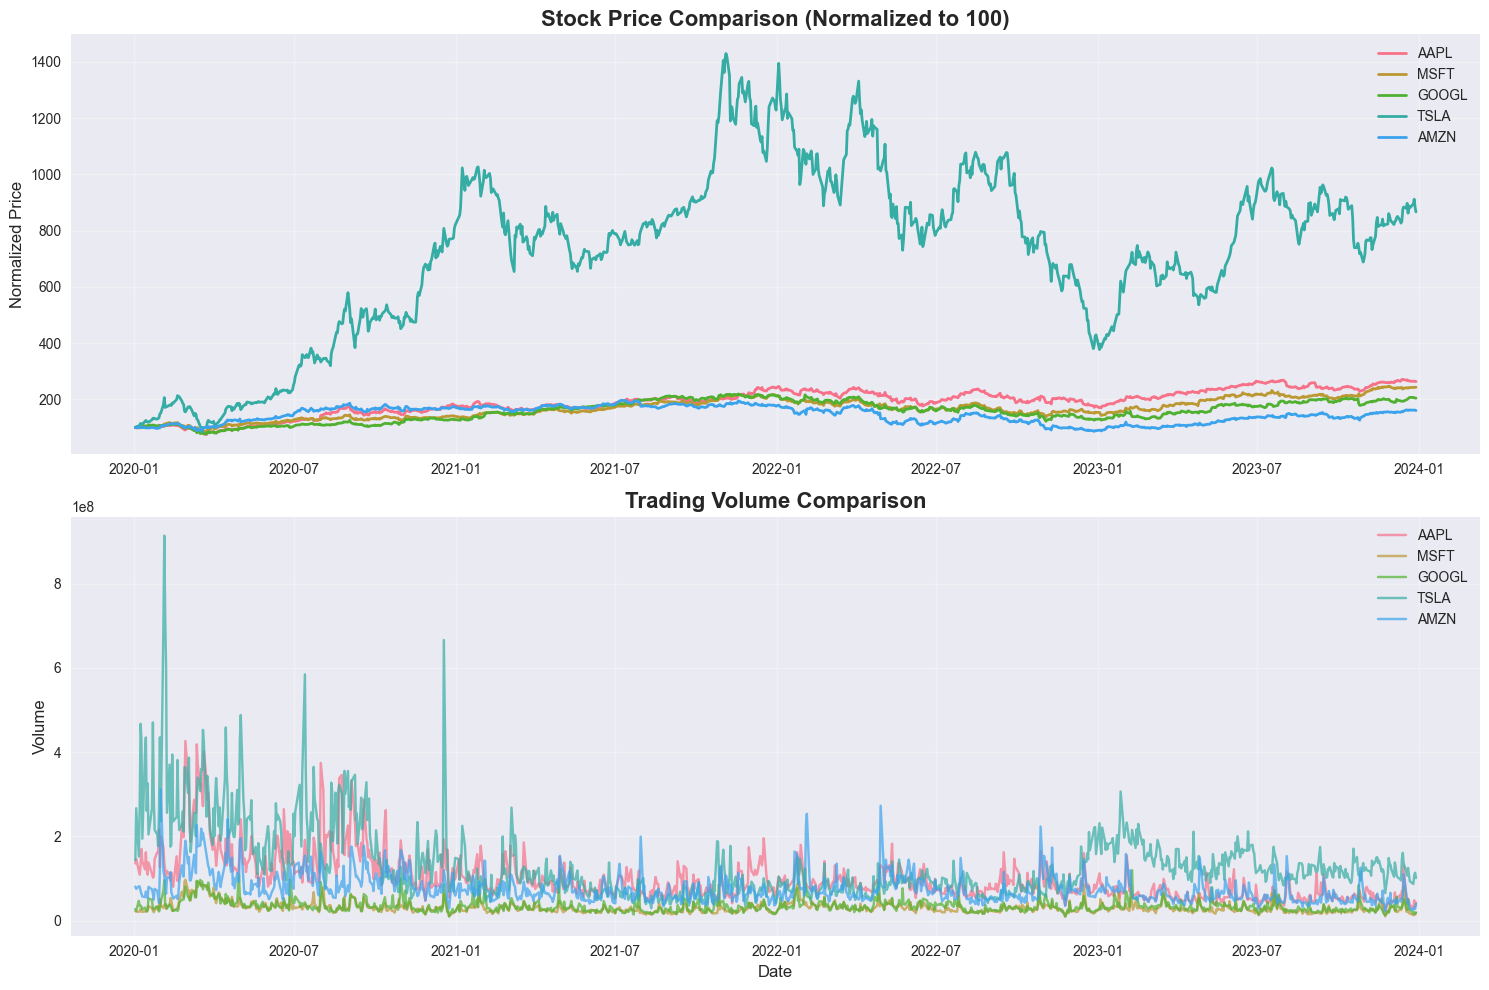

In [4]:
# Create price comparison chart
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Price comparison (normalized)
ax1 = axes[0]
for symbol, data in data_dict.items():
    normalized_price = data['close'] / data['close'].iloc[0] * 100
    ax1.plot(data.index, normalized_price, label=symbol, linewidth=2)

ax1.set_title('Stock Price Comparison (Normalized to 100)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Normalized Price', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Volume comparison
ax2 = axes[1]
for symbol, data in data_dict.items():
    ax2.plot(data.index, data['volume'], label=symbol, alpha=0.7)

ax2.set_title('Trading Volume Comparison', fontsize=16, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Volume', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 3. Strategy Implementation

Now let's create and test various trading strategies. We'll start with the Moving Average strategy.


In [5]:
# Use AAPL as our primary test symbol
primary_symbol = 'AAPL'
data = data_dict[primary_symbol]

print(f"🎯 Testing strategies on {primary_symbol}")
print(f"📅 Data period: {data.index[0].date()} to {data.index[-1].date()}")
print(f"📊 Total records: {len(data)}")
print("=" * 60)

# Create different strategy configurations
strategies = {
    'MA (10,30)': MovingAverageStrategy(10, 30, primary_symbol),
    'MA (20,50)': MovingAverageStrategy(20, 50, primary_symbol),
    'MA (50,200)': MovingAverageStrategy(50, 200, primary_symbol),
    'RSI (14,30/70)': RSIStrategy(14, 30, 70, primary_symbol),
    'RSI (21,25/75)': RSIStrategy(21, 25, 75, primary_symbol),
    'MACD (12,26,9)': MACDStrategy(12, 26, 9, primary_symbol),
    'MACD (8,21,5)': MACDStrategy(8, 21, 5, primary_symbol)
}

print(f"✅ Created {len(strategies)} trading strategies:")
for name, strategy in strategies.items():
    print(f"   • {name}: {strategy.get_parameters()}")


🎯 Testing strategies on AAPL
📅 Data period: 2020-01-02 to 2023-12-29
📊 Total records: 1006
✅ Created 7 trading strategies:
   • MA (10,30): {'short_window': 10, 'long_window': 30, 'symbol': 'AAPL'}
   • MA (20,50): {'short_window': 20, 'long_window': 50, 'symbol': 'AAPL'}
   • MA (50,200): {'short_window': 50, 'long_window': 200, 'symbol': 'AAPL'}
   • RSI (14,30/70): {'period': 14, 'oversold_threshold': 30, 'overbought_threshold': 70, 'symbol': 'AAPL'}
   • RSI (21,25/75): {'period': 21, 'oversold_threshold': 25, 'overbought_threshold': 75, 'symbol': 'AAPL'}
   • MACD (12,26,9): {'fast_period': 12, 'slow_period': 26, 'signal_period': 9, 'symbol': 'AAPL'}
   • MACD (8,21,5): {'fast_period': 8, 'slow_period': 21, 'signal_period': 5, 'symbol': 'AAPL'}


## 4. Backtesting Engine

Let's run backtests for all our strategies and compare their performance.


## 5. Trading Costs and Tax Analysis

One of the key features of this framework is its ability to model realistic trading costs and tax implications. Let's explore different cost structures and their impact on strategy performance.


In [6]:
# Define different cost and tax configurations
cost_tax_configs = {
    'No Costs, No Taxes': {
        'trading_costs': {
            'cost_type': 'fixed',
            'fixed_cost_per_trade': 0.0,
            'percentage_cost_per_trade': 0.0,
            'apply_to_buy': True,
            'apply_to_sell': True,
            'currency': 'EUR'
        },
        'tax_config': {
            'tax_rate': 0.0,
            'apply_immediately': True,
            'tax_on_realized_gains_only': True,
            'tax_free_threshold': 0.0,
            'currency': 'EUR'
        }
    },
    'Fixed Costs (10 EUR per trade)': {
        'trading_costs': {
            'cost_type': 'fixed',
            'fixed_cost_per_trade': 10.0,
            'percentage_cost_per_trade': 0.0,
            'apply_to_buy': True,
            'apply_to_sell': True,
            'currency': 'EUR'
        },
        'tax_config': {
            'tax_rate': 0.0,
            'apply_immediately': True,
            'tax_on_realized_gains_only': True,
            'tax_free_threshold': 0.0,
            'currency': 'EUR'
        }
    },
    'Percentage Costs (0.2%)': {
        'trading_costs': {
            'cost_type': 'percentage',
            'fixed_cost_per_trade': 0.0,
            'percentage_cost_per_trade': 0.002,  # 0.2%
            'apply_to_buy': True,
            'apply_to_sell': True,
            'currency': 'EUR'
        },
        'tax_config': {
            'tax_rate': 0.0,
            'apply_immediately': True,
            'tax_on_realized_gains_only': True,
            'tax_free_threshold': 0.0,
            'currency': 'EUR'
        }
    },
    'Fixed Costs + 25% Tax': {
        'trading_costs': {
            'cost_type': 'fixed',
            'fixed_cost_per_trade': 10.0,
            'percentage_cost_per_trade': 0.0,
            'apply_to_buy': True,
            'apply_to_sell': True,
            'currency': 'EUR'
        },
        'tax_config': {
            'tax_rate': 0.25,  # 25% tax on profits
            'apply_immediately': True,
            'tax_on_realized_gains_only': True,
            'tax_free_threshold': 0.0,
            'currency': 'EUR'
        }
    },
    'Realistic Costs + Taxes': {
        'trading_costs': {
            'cost_type': 'percentage',
            'fixed_cost_per_trade': 0.0,
            'percentage_cost_per_trade': 0.005,  # 0.5%
            'apply_to_buy': True,
            'apply_to_sell': True,
            'currency': 'EUR'
        },
        'tax_config': {
            'tax_rate': 0.30,  # 30% tax on profits
            'apply_immediately': True,
            'tax_on_realized_gains_only': True,
            'tax_free_threshold': 0.0,
            'currency': 'EUR'
        }
    }
}

print("💰 Trading Costs and Tax Configurations:")
print("=" * 60)
for name, config in cost_tax_configs.items():
    print(f"📋 {name}")
    print(f"   Trading Costs: {config['trading_costs']['cost_type']} - {config['trading_costs'].get('fixed_cost_per_trade', config['trading_costs'].get('percentage_cost_per_trade', 0))}")
    print(f"   Tax Rate: {config['tax_config']['tax_rate']:.1%}")
    print()


💰 Trading Costs and Tax Configurations:
📋 No Costs, No Taxes
   Trading Costs: fixed - 0.0
   Tax Rate: 0.0%

📋 Fixed Costs (10 EUR per trade)
   Trading Costs: fixed - 10.0
   Tax Rate: 0.0%

📋 Percentage Costs (0.2%)
   Trading Costs: percentage - 0.0
   Tax Rate: 0.0%

📋 Fixed Costs + 25% Tax
   Trading Costs: fixed - 10.0
   Tax Rate: 25.0%

📋 Realistic Costs + Taxes
   Trading Costs: percentage - 0.0
   Tax Rate: 30.0%



In [7]:
# Test the best strategy with different cost and tax configurations
print("🧪 Testing Moving Average (20,50) strategy with different cost/tax configurations...")
print("=" * 80)

# Use the Moving Average (20,50) strategy for consistency
test_strategy = MovingAverageStrategy(20, 50, primary_symbol)
cost_tax_results = {}

for config_name, config in cost_tax_configs.items():
    print(f"\n🔄 Testing: {config_name}")
    print("-" * 50)
    
    # Create engine with specific configuration
    engine = BacktestEngine(
        initial_capital=10000,
        trading_costs_config=config['trading_costs'],
        tax_config=config['tax_config']
    )
    
    try:
        result = engine.run_backtest(data, test_strategy)
        cost_tax_results[config_name] = result
        
        # Print summary
        summary = result.summary()
        print(f"   Final Value: ${summary['final_value']:.2f}")
        print(f"   Total Return: {summary['total_return']}")
        print(f"   Total Trades: {summary['total_trades']}")
        print(f"   Commission: {summary['commission_paid']}")
        print(f"   Trading Costs: {summary['trading_costs_paid']}")
        print(f"   Taxes: {summary['taxes_paid']}")
        
    except Exception as e:
        print(f"   ❌ Error: {e}")

print(f"\n✅ Completed {len(cost_tax_results)} cost/tax configuration tests")


2025-09-14 17:28:03,950 - INFO - Starting backtest with MovingAverageStrategy
2025-09-14 17:28:03,950 - INFO - Initialized strategy: MovingAverageStrategy
2025-09-14 17:28:03,976 - INFO - Bought 133 shares of AAPL at 71.12 (Total cost: 9469.08)
2025-09-14 17:28:04,014 - INFO - Sold 133 shares of AAPL at 109.94 (Net proceeds: 14606.94, Tax: 0.00)
2025-09-14 17:28:04,024 - INFO - Bought 124 shares of AAPL at 115.78 (Total cost: 14371.40)
2025-09-14 17:28:04,053 - INFO - Sold 124 shares of AAPL at 118.33 (Net proceeds: 14658.47, Tax: 0.00)
2025-09-14 17:28:04,065 - INFO - Bought 111 shares of AAPL at 131.58 (Total cost: 14620.42)
2025-09-14 17:28:04,078 - INFO - Sold 111 shares of AAPL at 124.00 (Net proceeds: 13749.91, Tax: 0.00)
2025-09-14 17:28:04,078 - INFO - Bought 104 shares of AAPL at 131.75 (Total cost: 13715.57)
2025-09-14 17:28:04,112 - INFO - Sold 104 shares of AAPL at 139.65 (Net proceeds: 14509.14, Tax: 0.00)
2025-09-14 17:28:04,125 - INFO - Bought 98 shares of AAPL at 147.79

🧪 Testing Moving Average (20,50) strategy with different cost/tax configurations...

🔄 Testing: No Costs, No Taxes
--------------------------------------------------


2025-09-14 17:28:04,148 - INFO - Sold 98 shares of AAPL at 171.35 (Net proceeds: 16775.98, Tax: 0.00)
2025-09-14 17:28:04,164 - INFO - Bought 97 shares of AAPL at 171.85 (Total cost: 16685.93)
2025-09-14 17:28:04,164 - INFO - Sold 97 shares of AAPL at 156.55 (Net proceeds: 15170.54, Tax: 0.00)
2025-09-14 17:28:04,195 - INFO - Bought 101 shares of AAPL at 150.45 (Total cost: 15210.92)
2025-09-14 17:28:04,212 - INFO - Sold 101 shares of AAPL at 152.08 (Net proceeds: 15344.66, Tax: 0.00)
2025-09-14 17:28:04,228 - INFO - Bought 105 shares of AAPL at 145.95 (Total cost: 15340.25)
2025-09-14 17:28:04,228 - INFO - Sold 105 shares of AAPL at 139.21 (Net proceeds: 14602.09, Tax: 0.00)
2025-09-14 17:28:04,228 - INFO - Bought 100 shares of AAPL at 146.25 (Total cost: 14639.37)
2025-09-14 17:28:04,237 - INFO - Sold 100 shares of AAPL at 130.53 (Net proceeds: 13039.86, Tax: 0.00)
2025-09-14 17:28:04,245 - INFO - Bought 86 shares of AAPL at 152.35 (Total cost: 13115.32)
2025-09-14 17:28:04,299 - INF

   Final Value: $16203.43
   Total Return: 62.03%
   Total Trades: 21
   Commission: $304.02
   Trading Costs: $0.00
   Taxes: $0.00

🔄 Testing: Fixed Costs (10 EUR per trade)
--------------------------------------------------


2025-09-14 17:28:04,529 - INFO - Sold 98 shares of AAPL at 171.35 (Net proceeds: 16765.98, Tax: 0.00)
2025-09-14 17:28:04,548 - INFO - Bought 96 shares of AAPL at 171.85 (Total cost: 16523.91)
2025-09-14 17:28:04,548 - INFO - Sold 96 shares of AAPL at 156.55 (Net proceeds: 15004.14, Tax: 0.00)
2025-09-14 17:28:04,582 - INFO - Bought 101 shares of AAPL at 150.45 (Total cost: 15220.92)
2025-09-14 17:28:04,597 - INFO - Sold 101 shares of AAPL at 152.08 (Net proceeds: 15334.66, Tax: 0.00)
2025-09-14 17:28:04,621 - INFO - Bought 104 shares of AAPL at 145.95 (Total cost: 15204.15)
2025-09-14 17:28:04,621 - INFO - Sold 104 shares of AAPL at 139.21 (Net proceeds: 14453.02, Tax: 0.00)
2025-09-14 17:28:04,621 - INFO - Bought 99 shares of AAPL at 146.25 (Total cost: 14502.97)
2025-09-14 17:28:04,631 - INFO - Sold 99 shares of AAPL at 130.53 (Net proceeds: 12899.46, Tax: 0.00)
2025-09-14 17:28:04,631 - INFO - Bought 85 shares of AAPL at 152.35 (Total cost: 12972.82)
2025-09-14 17:28:04,696 - INFO 

   Final Value: $16010.57
   Total Return: 60.11%
   Total Trades: 21
   Commission: $302.13
   Trading Costs: $210.00
   Taxes: $0.00

🔄 Testing: Percentage Costs (0.2%)
--------------------------------------------------


2025-09-14 17:28:04,950 - INFO - Bought 95 shares of AAPL at 171.85 (Total cost: 16374.54)
2025-09-14 17:28:04,960 - INFO - Sold 95 shares of AAPL at 156.55 (Net proceeds: 14828.00, Tax: 0.00)
2025-09-14 17:28:04,986 - INFO - Bought 99 shares of AAPL at 150.45 (Total cost: 14939.51)
2025-09-14 17:28:04,999 - INFO - Sold 99 shares of AAPL at 152.08 (Net proceeds: 15010.69, Tax: 0.00)
2025-09-14 17:28:05,044 - INFO - Bought 103 shares of AAPL at 145.95 (Total cost: 15078.12)
2025-09-14 17:28:05,052 - INFO - Sold 103 shares of AAPL at 139.21 (Net proceeds: 14295.28, Tax: 0.00)
2025-09-14 17:28:05,057 - INFO - Bought 97 shares of AAPL at 146.25 (Total cost: 14228.56)
2025-09-14 17:28:05,067 - INFO - Sold 97 shares of AAPL at 130.53 (Net proceeds: 12623.34, Tax: 0.00)
2025-09-14 17:28:05,089 - INFO - Bought 83 shares of AAPL at 152.35 (Total cost: 12683.10)
2025-09-14 17:28:05,169 - INFO - Sold 83 shares of AAPL at 174.86 (Net proceeds: 14469.62, Tax: 0.00)
2025-09-14 17:28:05,202 - INFO - 

   Final Value: $15590.12
   Total Return: 55.90%
   Total Trades: 21
   Commission: $298.74
   Trading Costs: $597.48
   Taxes: $0.00

🔄 Testing: Fixed Costs + 25% Tax
--------------------------------------------------


2025-09-14 17:28:05,422 - INFO - Sold 88 shares of AAPL at 171.35 (Net proceeds: 14547.65, Tax: 506.49)
2025-09-14 17:28:05,438 - INFO - Bought 84 shares of AAPL at 171.85 (Total cost: 14459.67)
2025-09-14 17:28:05,448 - INFO - Sold 84 shares of AAPL at 156.55 (Net proceeds: 13127.37, Tax: 0.00)
2025-09-14 17:28:05,469 - INFO - Bought 87 shares of AAPL at 150.45 (Total cost: 13112.48)
2025-09-14 17:28:05,486 - INFO - Sold 87 shares of AAPL at 152.08 (Net proceeds: 13183.88, Tax: 23.80)
2025-09-14 17:28:05,504 - INFO - Bought 91 shares of AAPL at 145.95 (Total cost: 13304.88)
2025-09-14 17:28:05,504 - INFO - Sold 91 shares of AAPL at 139.21 (Net proceeds: 12645.14, Tax: 0.00)
2025-09-14 17:28:05,504 - INFO - Bought 86 shares of AAPL at 146.25 (Total cost: 12599.86)
2025-09-14 17:28:05,515 - INFO - Sold 86 shares of AAPL at 130.53 (Net proceeds: 11204.28, Tax: 0.00)
2025-09-14 17:28:05,521 - INFO - Bought 74 shares of AAPL at 152.35 (Total cost: 11295.27)
2025-09-14 17:28:05,584 - INFO -

   Final Value: $13471.09
   Total Return: 34.71%
   Total Trades: 21
   Commission: $270.54
   Trading Costs: $210.00
   Taxes: $2451.69

🔄 Testing: Realistic Costs + Taxes
--------------------------------------------------


2025-09-14 17:28:05,846 - INFO - Bought 79 shares of AAPL at 171.85 (Total cost: 13657.45)
2025-09-14 17:28:05,846 - INFO - Sold 79 shares of AAPL at 156.55 (Net proceeds: 12293.55, Tax: 0.00)
2025-09-14 17:28:05,879 - INFO - Bought 82 shares of AAPL at 150.45 (Total cost: 12411.15)
2025-09-14 17:28:05,897 - INFO - Sold 82 shares of AAPL at 152.08 (Net proceeds: 12395.69, Tax: 0.00)
2025-09-14 17:28:05,916 - INFO - Bought 84 shares of AAPL at 145.95 (Total cost: 12333.50)
2025-09-14 17:28:05,919 - INFO - Sold 84 shares of AAPL at 139.21 (Net proceeds: 11623.20, Tax: 0.00)
2025-09-14 17:28:05,921 - INFO - Bought 79 shares of AAPL at 146.25 (Total cost: 11622.87)
2025-09-14 17:28:05,921 - INFO - Sold 79 shares of AAPL at 130.53 (Net proceeds: 10249.93, Tax: 0.00)
2025-09-14 17:28:05,939 - INFO - Bought 68 shares of AAPL at 152.35 (Total cost: 10422.05)
2025-09-14 17:28:05,986 - INFO - Sold 68 shares of AAPL at 174.86 (Net proceeds: 11399.88, Tax: 419.07)
2025-09-14 17:28:06,021 - INFO - 

   Final Value: $12130.60
   Total Return: 21.31%
   Total Trades: 21
   Commission: $256.36
   Trading Costs: $1281.79
   Taxes: $2679.02

✅ Completed 5 cost/tax configuration tests


In [8]:
# Create comparison table for cost/tax analysis
print("\n📊 Cost and Tax Impact Analysis")
print("=" * 100)

comparison_data = []
for config_name, result in cost_tax_results.items():
    summary = result.summary()
    comparison_data.append({
        'Configuration': config_name,
        'Final Value': f"${summary['final_value']:.2f}",
        'Total Return': summary['total_return'],
        'Total Trades': summary['total_trades'],
        'Commission': summary['commission_paid'],
        'Trading Costs': summary['trading_costs_paid'],
        'Taxes': summary['taxes_paid']
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Calculate impact analysis
if len(cost_tax_results) >= 2:
    no_costs = cost_tax_results['No Costs, No Taxes']
    realistic = cost_tax_results['Realistic Costs + Taxes']
    
    no_costs_return = float(no_costs.summary()['total_return'].replace('%', ''))
    realistic_return = float(realistic.summary()['total_return'].replace('%', ''))
    
    print(f"\n💡 Key Insights:")
    print(f"   • Impact of realistic costs/taxes: {realistic_return - no_costs_return:.2f}%")
    print(f"   • Cost structure significantly affects returns")
    print(f"   • Taxes only apply to profitable trades")
    print(f"   • Fixed costs affect small trades more than percentage costs")



📊 Cost and Tax Impact Analysis
                 Configuration Final Value Total Return  Total Trades Commission Trading Costs    Taxes
            No Costs, No Taxes   $16203.43       62.03%            21    $304.02         $0.00    $0.00
Fixed Costs (10 EUR per trade)   $16010.57       60.11%            21    $302.13       $210.00    $0.00
       Percentage Costs (0.2%)   $15590.12       55.90%            21    $298.74       $597.48    $0.00
         Fixed Costs + 25% Tax   $13471.09       34.71%            21    $270.54       $210.00 $2451.69
       Realistic Costs + Taxes   $12130.60       21.31%            21    $256.36      $1281.79 $2679.02

💡 Key Insights:
   • Impact of realistic costs/taxes: -40.72%
   • Cost structure significantly affects returns
   • Taxes only apply to profitable trades
   • Fixed costs affect small trades more than percentage costs


### Configuration System

The framework includes a comprehensive configuration system that allows you to easily customize trading costs and tax settings. Let's explore how to use it:


In [9]:
# Demonstrate configuration system usage
print("⚙️ Configuration System Demo")
print("=" * 50)

# Show how to get default settings
print("📋 Default Trading Costs Settings:")
print(f"   Cost Type: {get_setting('trading_costs', 'cost_type')}")
print(f"   Fixed Cost: {get_setting('trading_costs', 'fixed_cost_per_trade')} EUR")
print(f"   Percentage Cost: {get_setting('trading_costs', 'percentage_cost_per_trade'):.1%}")
print(f"   Apply to Buy: {get_setting('trading_costs', 'apply_to_buy')}")
print(f"   Apply to Sell: {get_setting('trading_costs', 'apply_to_sell')}")

print("\n📋 Default Tax Settings:")
print(f"   Tax Rate: {get_setting('tax', 'tax_rate'):.1%}")
print(f"   Apply Immediately: {get_setting('tax', 'apply_immediately')}")
print(f"   Tax-Free Threshold: {get_setting('tax', 'tax_free_threshold')} EUR")

print("\n💡 You can modify these settings in config/settings.py")
print("   or pass custom configurations to the BacktestEngine")


⚙️ Configuration System Demo
📋 Default Trading Costs Settings:
   Cost Type: percentage
   Fixed Cost: 10.0 EUR
   Percentage Cost: 0.2%
   Apply to Buy: True
   Apply to Sell: True

📋 Default Tax Settings:
   Tax Rate: 25.0%
   Apply Immediately: True
   Tax-Free Threshold: 0.0 EUR

💡 You can modify these settings in config/settings.py
   or pass custom configurations to the BacktestEngine


In [10]:
# Initialize backtesting engine
engine = BacktestEngine(
    initial_capital=10000,
    commission=0.001
)

print(f"⚙️ Running backtests with ${engine.initial_capital:,.0f} initial capital")
print(f"💸 Commission rate: {engine.commission:.1%}")
print("=" * 60)

# Run backtests for all strategies
results = {}
for name, strategy in strategies.items():
    print(f"🔄 Testing {name}...")
    try:
        result = engine.run_backtest(data, strategy)
        results[name] = result
        final_value = result.portfolio.portfolio_value
        total_return = result.metrics.get('total_return', 0)
        print(f"   ✅ Completed - Final: ${final_value:,.2f} ({total_return:.2%})")
    except Exception as e:
        print(f"   ❌ Error: {e}")

print(f"\n📊 Successfully completed {len(results)} backtests")


2025-09-14 17:29:04,062 - INFO - Starting backtest with MovingAverageStrategy
2025-09-14 17:29:04,063 - INFO - Initialized strategy: MovingAverageStrategy
2025-09-14 17:29:04,087 - INFO - Bought 137 shares of AAPL at 68.86 (Total cost: 9461.66)
2025-09-14 17:29:04,130 - INFO - Sold 137 shares of AAPL at 109.07 (Net proceeds: 13538.82, Tax: 1359.05)
2025-09-14 17:29:04,139 - INFO - Bought 110 shares of AAPL at 121.01 (Total cost: 13350.60)
2025-09-14 17:29:04,146 - INFO - Sold 110 shares of AAPL at 105.89 (Net proceeds: 11612.96, Tax: 0.00)
2025-09-14 17:29:04,153 - INFO - Bought 99 shares of AAPL at 117.22 (Total cost: 11639.58)
2025-09-14 17:29:04,178 - INFO - Sold 99 shares of AAPL at 122.96 (Net proceeds: 12012.09, Tax: 124.17)
2025-09-14 17:29:04,192 - INFO - Bought 96 shares of AAPL at 124.81 (Total cost: 12017.85)
2025-09-14 17:29:04,200 - INFO - Sold 96 shares of AAPL at 123.08 (Net proceeds: 11780.06, Tax: 0.00)
2025-09-14 17:29:04,205 - INFO - Bought 93 shares of AAPL at 126.7

⚙️ Running backtests with $10,000 initial capital
💸 Commission rate: 0.1%
🔄 Testing MA (10,30)...


2025-09-14 17:29:04,239 - INFO - Bought 86 shares of AAPL at 146.34 (Total cost: 12622.74)
2025-09-14 17:29:04,275 - INFO - Sold 86 shares of AAPL at 166.47 (Net proceeds: 13860.94, Tax: 412.73)
2025-09-14 17:29:04,281 - INFO - Bought 80 shares of AAPL at 173.05 (Total cost: 13885.18)
2025-09-14 17:29:04,285 - INFO - Sold 80 shares of AAPL at 159.75 (Net proceeds: 12741.98, Tax: 0.00)
2025-09-14 17:29:04,289 - INFO - Bought 74 shares of AAPL at 172.38 (Total cost: 12794.25)
2025-09-14 17:29:04,289 - INFO - Sold 74 shares of AAPL at 163.37 (Net proceeds: 12052.85, Tax: 0.00)
2025-09-14 17:29:04,324 - INFO - Bought 83 shares of AAPL at 144.55 (Total cost: 12033.99)
2025-09-14 17:29:04,339 - INFO - Sold 83 shares of AAPL at 155.51 (Net proceeds: 12659.66, Tax: 208.56)
2025-09-14 17:29:04,355 - INFO - Bought 82 shares of AAPL at 153.32 (Total cost: 12609.94)
2025-09-14 17:29:04,355 - INFO - Sold 82 shares of AAPL at 147.62 (Net proceeds: 12068.37, Tax: 0.00)
2025-09-14 17:29:04,355 - INFO 

   ✅ Completed - Final: $13,442.58 (34.43%)
🔄 Testing MA (20,50)...


2025-09-14 17:29:04,701 - INFO - Bought 83 shares of AAPL at 171.85 (Total cost: 14306.17)
2025-09-14 17:29:04,710 - INFO - Sold 83 shares of AAPL at 156.55 (Net proceeds: 12954.99, Tax: 0.00)
2025-09-14 17:29:04,731 - INFO - Bought 86 shares of AAPL at 150.45 (Total cost: 12977.75)
2025-09-14 17:29:04,750 - INFO - Sold 86 shares of AAPL at 152.08 (Net proceeds: 13024.13, Tax: 15.46)
2025-09-14 17:29:04,773 - INFO - Bought 89 shares of AAPL at 145.95 (Total cost: 13028.66)
2025-09-14 17:29:04,777 - INFO - Sold 89 shares of AAPL at 139.21 (Net proceeds: 12352.23, Tax: 0.00)
2025-09-14 17:29:04,777 - INFO - Bought 85 shares of AAPL at 146.25 (Total cost: 12468.33)
2025-09-14 17:29:04,785 - INFO - Sold 85 shares of AAPL at 130.53 (Net proceeds: 11061.69, Tax: 0.00)
2025-09-14 17:29:04,795 - INFO - Bought 73 shares of AAPL at 152.35 (Total cost: 11155.01)
2025-09-14 17:29:04,845 - INFO - Sold 73 shares of AAPL at 174.86 (Net proceeds: 12333.47, Tax: 392.82)
2025-09-14 17:29:04,872 - INFO -

   ✅ Completed - Final: $13,195.93 (31.96%)
🔄 Testing MA (50,200)...


2025-09-14 17:29:05,159 - INFO - Bought 63 shares of AAPL at 148.43 (Total cost: 9378.95)
2025-09-14 17:29:05,159 - INFO - Sold 63 shares of AAPL at 137.91 (Net proceeds: 8662.45, Tax: 0.00)
2025-09-14 17:29:05,210 - INFO - Bought 56 shares of AAPL at 155.87 (Total cost: 8755.06)
2025-09-14 17:29:05,293 - INFO - Backtest completed. Final portfolio value: 11219.60
2025-09-14 17:29:05,294 - INFO - Starting backtest with RSIStrategy
2025-09-14 17:29:05,295 - INFO - Initialized strategy: RSIStrategy
2025-09-14 17:29:05,332 - INFO - Bought 136 shares of AAPL at 69.74 (Total cost: 9513.13)
2025-09-14 17:29:05,374 - INFO - Sold 136 shares of AAPL at 66.15 (Net proceeds: 8969.43, Tax: 0.00)


   ✅ Completed - Final: $11,219.60 (12.20%)
🔄 Testing RSI (14,30/70)...


2025-09-14 17:29:05,516 - INFO - Bought 82 shares of AAPL at 108.76 (Total cost: 8945.04)
2025-09-14 17:29:05,562 - INFO - Sold 82 shares of AAPL at 115.60 (Net proceeds: 9324.48, Tax: 126.48)
2025-09-14 17:29:05,643 - INFO - Bought 71 shares of AAPL at 129.97 (Total cost: 9255.82)
2025-09-14 17:29:05,679 - INFO - Sold 71 shares of AAPL at 127.21 (Net proceeds: 9004.96, Tax: 0.00)
2025-09-14 17:29:05,710 - INFO - Bought 75 shares of AAPL at 120.01 (Total cost: 9027.67)
2025-09-14 17:29:05,747 - INFO - Sold 75 shares of AAPL at 128.83 (Net proceeds: 9481.64, Tax: 151.32)
2025-09-14 17:29:05,839 - INFO - Bought 68 shares of AAPL at 139.93 (Total cost: 9544.10)
2025-09-14 17:29:05,862 - INFO - Sold 68 shares of AAPL at 145.56 (Net proceeds: 9787.50, Tax: 81.13)
2025-09-14 17:29:05,943 - INFO - Bought 59 shares of AAPL at 162.97 (Total cost: 9644.21)
2025-09-14 17:29:06,010 - INFO - Sold 59 shares of AAPL at 172.38 (Net proceeds: 10015.90, Tax: 123.90)
2025-09-14 17:29:06,023 - INFO - Boug

   ✅ Completed - Final: $9,273.53 (-7.26%)
🔄 Testing RSI (21,25/75)...


2025-09-14 17:29:06,918 - INFO - Bought 77 shares of AAPL at 122.32 (Total cost: 9447.13)
2025-09-14 17:29:07,023 - INFO - Sold 77 shares of AAPL at 133.88 (Net proceeds: 10070.14, Tax: 207.67)
2025-09-14 17:29:07,193 - INFO - Bought 64 shares of AAPL at 156.56 (Total cost: 10049.93)
2025-09-14 17:29:07,354 - INFO - Sold 64 shares of AAPL at 158.78 (Net proceeds: 10111.04, Tax: 20.37)
2025-09-14 17:29:07,710 - INFO - Bought 58 shares of AAPL at 172.31 (Total cost: 10024.09)
2025-09-14 17:29:07,801 - INFO - Sold 58 shares of AAPL at 188.38 (Net proceeds: 10675.76, Tax: 217.22)
2025-09-14 17:29:07,830 - INFO - Backtest completed. Final portfolio value: 11335.78
2025-09-14 17:29:07,830 - INFO - Starting backtest with MACDStrategy
2025-09-14 17:29:07,830 - INFO - Initialized strategy: MACDStrategy
2025-09-14 17:29:07,857 - INFO - Bought 151 shares of AAPL at 62.56 (Total cost: 9475.63)
2025-09-14 17:29:07,882 - INFO - Sold 151 shares of AAPL at 77.22 (Net proceeds: 11087.68, Tax: 537.35)
2

   ✅ Completed - Final: $11,335.78 (13.36%)
🔄 Testing MACD (12,26,9)...


2025-09-14 17:29:08,029 - INFO - Sold 98 shares of AAPL at 130.26 (Net proceeds: 12518.44, Tax: 208.42)
2025-09-14 17:29:08,046 - INFO - Bought 102 shares of AAPL at 123.07 (Total cost: 12590.64)
2025-09-14 17:29:08,065 - INFO - Sold 102 shares of AAPL at 142.13 (Net proceeds: 13987.98, Tax: 465.78)
2025-09-14 17:29:08,078 - INFO - Bought 94 shares of AAPL at 147.03 (Total cost: 13862.48)
2025-09-14 17:29:08,080 - INFO - Sold 94 shares of AAPL at 143.28 (Net proceeds: 13428.16, Tax: 0.00)
2025-09-14 17:29:08,085 - INFO - Bought 90 shares of AAPL at 148.64 (Total cost: 13417.52)
2025-09-14 17:29:08,090 - INFO - Sold 90 shares of AAPL at 145.84 (Net proceeds: 13086.02, Tax: 0.00)
2025-09-14 17:29:08,099 - INFO - Bought 93 shares of AAPL at 140.74 (Total cost: 13127.84)
2025-09-14 17:29:08,117 - INFO - Sold 93 shares of AAPL at 145.02 (Net proceeds: 13366.84, Tax: 79.67)
2025-09-14 17:29:08,120 - INFO - Bought 88 shares of AAPL at 150.48 (Total cost: 13282.15)
2025-09-14 17:29:08,131 - IN

   ✅ Completed - Final: $15,165.69 (51.66%)
🔄 Testing MACD (8,21,5)...


2025-09-14 17:29:08,659 - INFO - Sold 77 shares of AAPL at 130.28 (Net proceeds: 9798.79, Tax: 202.38)
2025-09-14 17:29:08,665 - INFO - Bought 78 shares of AAPL at 124.45 (Total cost: 9735.97)
2025-09-14 17:29:08,676 - INFO - Sold 78 shares of AAPL at 121.81 (Net proceeds: 9472.48, Tax: 0.00)
2025-09-14 17:29:08,679 - INFO - Bought 77 shares of AAPL at 123.06 (Total cost: 9503.95)
2025-09-14 17:29:08,697 - INFO - Sold 77 shares of AAPL at 139.25 (Net proceeds: 10393.33, Tax: 296.46)
2025-09-14 17:29:08,708 - INFO - Bought 71 shares of AAPL at 145.97 (Total cost: 10394.61)
2025-09-14 17:29:08,712 - INFO - Sold 71 shares of AAPL at 143.28 (Net proceeds: 10142.55, Tax: 0.00)
2025-09-14 17:29:08,715 - INFO - Bought 67 shares of AAPL at 149.90 (Total cost: 10073.46)
2025-09-14 17:29:08,722 - INFO - Sold 67 shares of AAPL at 145.84 (Net proceeds: 9741.82, Tax: 0.00)
2025-09-14 17:29:08,734 - INFO - Bought 70 shares of AAPL at 140.28 (Total cost: 9848.86)
2025-09-14 17:29:08,746 - INFO - Sold

   ✅ Completed - Final: $9,432.89 (-5.67%)

📊 Successfully completed 7 backtests


## 5. Performance Analysis

Let's analyze and compare the performance of all strategies.


In [11]:
# Create performance comparison table
comparison_data = []
for name, result in results.items():
    summary = result.summary()
    comparison_data.append({
        'Strategy': name,
        'Total Return': summary['total_return'],
        'Annualized Return': summary['annualized_return'],
        'Sharpe Ratio': summary['sharpe_ratio'],
        'Max Drawdown': summary['max_drawdown'],
        'Win Rate': summary['win_rate'],
        'Total Trades': summary['total_trades'],
        'Final Value': summary['final_value']
    })

comparison_df = pd.DataFrame(comparison_data)

print("📈 Strategy Performance Comparison")
print("=" * 100)
print(comparison_df.to_string(index=False, float_format='%.2f'))

# Find best and worst strategies
best_strategy = max(results.keys(), key=lambda x: results[x].metrics.get('total_return', 0))
worst_strategy = min(results.keys(), key=lambda x: results[x].metrics.get('total_return', 0))

print(f"\n🏆 Best Strategy: {best_strategy}")
print(f"   Total Return: {results[best_strategy].summary()['total_return']}")
print(f"   Sharpe Ratio: {results[best_strategy].summary()['sharpe_ratio']}")

print(f"\n📉 Worst Strategy: {worst_strategy}")
print(f"   Total Return: {results[worst_strategy].summary()['total_return']}")
print(f"   Sharpe Ratio: {results[worst_strategy].summary()['sharpe_ratio']}")


📈 Strategy Performance Comparison
      Strategy Total Return Annualized Return Sharpe Ratio Max Drawdown Win Rate  Total Trades  Final Value
    MA (10,30)       34.43%            10.21%         0.36       36.76%   22.58%            31     13442.58
    MA (20,50)       31.96%             9.55%         0.34       38.19%   28.57%            21     13195.93
   MA (50,200)       12.20%             3.31%         0.15       14.24%    0.00%             3     11219.60
RSI (14,30/70)       -7.26%             1.17%        -0.03       28.70%   30.00%            20      9273.53
RSI (21,25/75)       13.36%             4.38%         0.15       25.90%   50.00%             6     11335.78
MACD (12,26,9)       51.66%            13.13%         0.53       20.06%   22.06%            68     15165.69
 MACD (8,21,5)       -5.67%             0.51%        -0.07       26.21%   20.69%           116      9432.89

🏆 Best Strategy: MACD (12,26,9)
   Total Return: 51.66%
   Sharpe Ratio: 0.53

📉 Worst Strategy: RSI 

In [12]:
# Detailed analysis of the best strategy
print(f"\n🔍 Detailed Analysis - {best_strategy}")
print("=" * 60)
best_result = results[best_strategy]
best_result.print_summary()

# Show trading activity
trades_df = best_result.get_trades_dataframe()
if not trades_df.empty:
    print(f"\n📊 Trading Activity:")
    print(f"   Total Trades: {len(trades_df)}")
    print(f"   Buy Trades: {len(trades_df[trades_df['action'] == 'BUY'])}")
    print(f"   Sell Trades: {len(trades_df[trades_df['action'] == 'SELL'])}")
    
    print(f"\n📋 Recent Trades (last 10):")
    print(trades_df.tail(10).to_string(index=False))
else:
    print("\n📊 No trades executed during backtest period")



🔍 Detailed Analysis - MACD (12,26,9)

BACKTEST RESULTS - MACDStrategy
Strategy: MACDStrategy
Initial Capital: 10000
Final Value: 15165.693710245128
Total Return: 51.66%
Annualized Return: 13.13%
Volatility: 19.54%
Sharpe Ratio: 0.53
Max Drawdown: 20.06%
Win Rate: 22.06%
Total Trades: 68
Commission Paid: $911.76
Trading Costs Paid: $1823.52
Taxes Paid: $4098.80

📊 Trading Activity:
   Total Trades: 116
   Buy Trades: 58
   Sell Trades: 58

📋 Recent Trades (last 10):
                timestamp symbol action  shares      price  trade_value  commission  trading_cost  total_cost  cash_after  portfolio_value  gross_proceeds      profit   tax_paid  net_proceeds
2023-09-19 00:00:00-04:00   AAPL    BUY      50 177.333023  8866.651154    8.866651     17.733302 8893.251107  488.606476      9355.257630             NaN         NaN        NaN           NaN
2023-09-20 00:00:00-04:00   AAPL   SELL      50 173.787735  8689.386749    8.689387     17.378773         NaN 9151.925065      9151.925065     86

## 7. Visualization

Let's create comprehensive visualizations to understand strategy performance.


📊 Generating performance plot for MACD (12,26,9)...


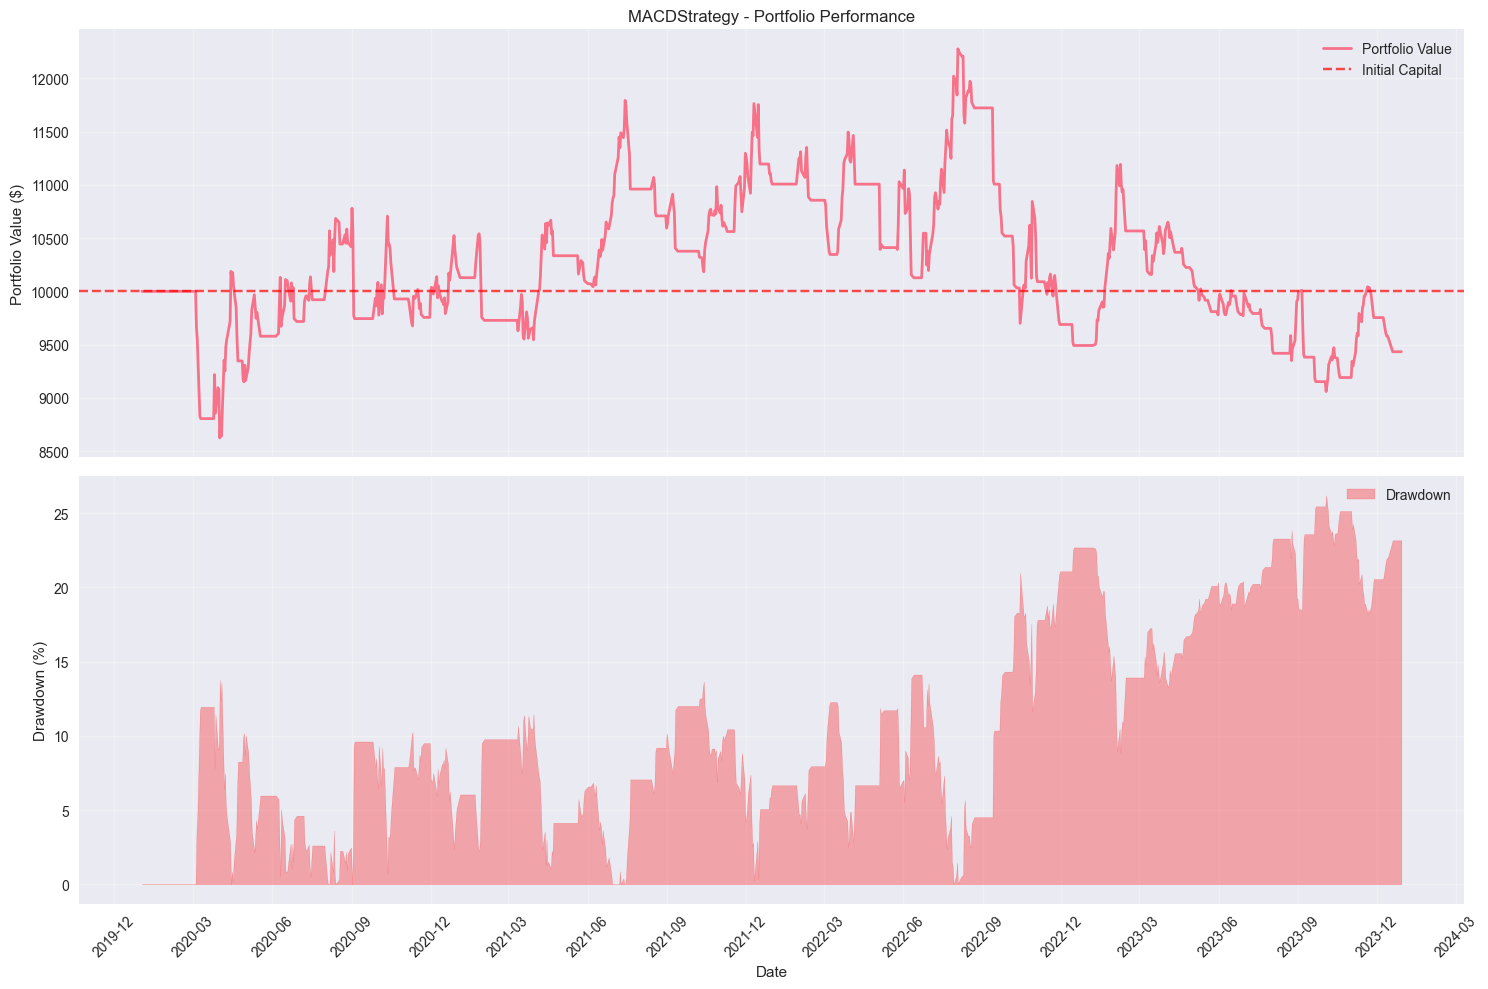

In [13]:
# Plot performance of the best strategy
print(f"📊 Generating performance plot for {best_strategy}...")
best_result.plot_performance(figsize=(15, 10))


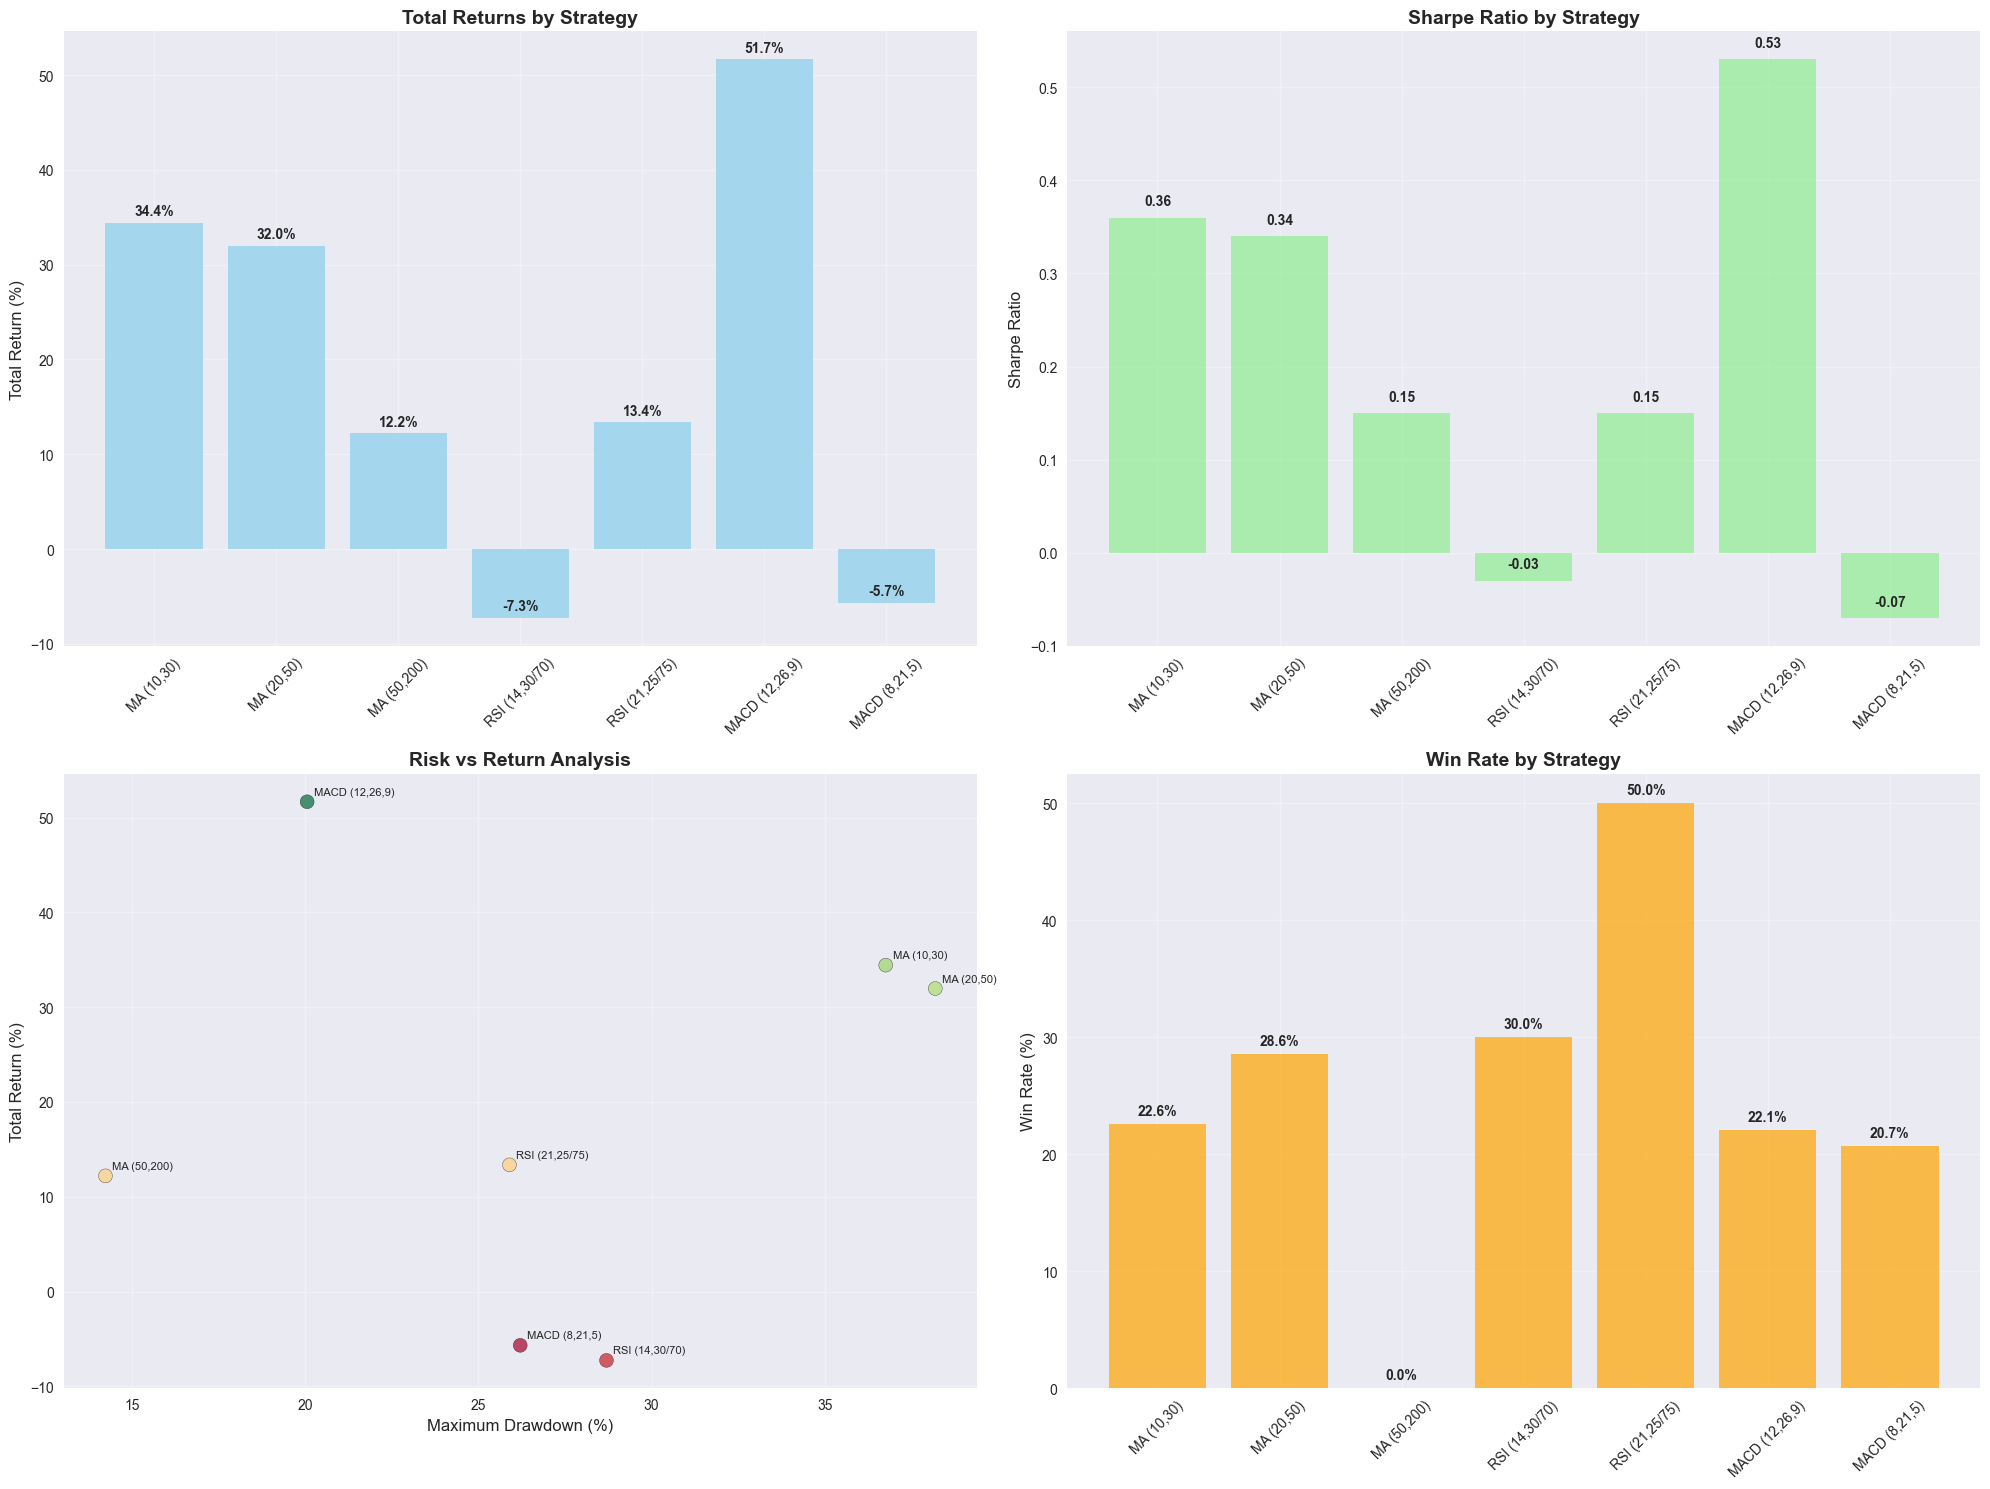

In [14]:
# Create strategy comparison visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Plot 1: Returns comparison
ax1 = axes[0, 0]
strategy_returns = [float(result.summary()['total_return'].replace('%', '')) for result in results.values()]
strategy_names = list(results.keys())
bars = ax1.bar(strategy_names, strategy_returns, color='skyblue', alpha=0.7)
ax1.set_title('Total Returns by Strategy', fontsize=14, fontweight='bold')
ax1.set_ylabel('Total Return (%)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, strategy_returns):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# Plot 2: Sharpe ratio comparison
ax2 = axes[0, 1]
sharpe_ratios = [float(result.summary()['sharpe_ratio']) for result in results.values()]
bars2 = ax2.bar(strategy_names, sharpe_ratios, color='lightgreen', alpha=0.7)
ax2.set_title('Sharpe Ratio by Strategy', fontsize=14, fontweight='bold')
ax2.set_ylabel('Sharpe Ratio', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars2, sharpe_ratios):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

# Plot 3: Risk vs Return scatter
ax3 = axes[1, 0]
max_drawdowns = [float(result.summary()['max_drawdown'].replace('%', '')) for result in results.values()]
ax3.scatter(max_drawdowns, strategy_returns, s=100, alpha=0.7, c=sharpe_ratios, 
           cmap='RdYlGn', edgecolors='black')
ax3.set_xlabel('Maximum Drawdown (%)', fontsize=12)
ax3.set_ylabel('Total Return (%)', fontsize=12)
ax3.set_title('Risk vs Return Analysis', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Add strategy labels
for i, name in enumerate(strategy_names):
    ax3.annotate(name, (max_drawdowns[i], strategy_returns[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# Plot 4: Win rate comparison
ax4 = axes[1, 1]
win_rates = [float(result.summary()['win_rate'].replace('%', '')) for result in results.values()]
bars4 = ax4.bar(strategy_names, win_rates, color='orange', alpha=0.7)
ax4.set_title('Win Rate by Strategy', fontsize=14, fontweight='bold')
ax4.set_ylabel('Win Rate (%)', fontsize=12)
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars4, win_rates):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


## Key Features Highlight

### 🆕 New in This Version

This framework now includes advanced features for realistic backtesting:

- **Trading Costs**: Support for both fixed and percentage-based trading costs
- **Tax Modeling**: Immediate tax deduction on profitable trades
- **Configuration System**: Easy customization of costs, taxes, and other parameters
- **Enhanced Metrics**: Detailed cost and tax tracking in performance analysis


## 7. Custom Strategy Creation

Let's create a custom strategy to demonstrate how easy it is to implement new trading strategies.


In [15]:
# Create a custom strategy class
from src.strategies.base_strategy import BaseStrategy
import pandas as pd
import numpy as np

class CustomBollingerBandsStrategy(BaseStrategy):
    """
    Custom Bollinger Bands strategy.
    
    Buys when price touches lower band and RSI < 30.
    Sells when price touches upper band and RSI > 70.
    """
    
    def __init__(self, window=20, std_dev=2, rsi_window=14, symbol='SYMBOL'):
        super().__init__()
        self.window = window
        self.std_dev = std_dev
        self.rsi_window = rsi_window
        self.symbol = symbol
    
    def generate_signals(self, data):
        if len(data) < max(self.window, self.rsi_window) + 1:
            return {self.symbol: 'HOLD'}
        
        # Calculate Bollinger Bands
        sma = data['close'].rolling(window=self.window).mean()
        std = data['close'].rolling(window=self.window).std()
        upper_band = sma + (std * self.std_dev)
        lower_band = sma - (std * self.std_dev)
        
        # Calculate RSI
        delta = data['close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=self.rsi_window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=self.rsi_window).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        
        # Get current values
        current_price = data['close'].iloc[-1]
        current_upper = upper_band.iloc[-1]
        current_lower = lower_band.iloc[-1]
        current_rsi = rsi.iloc[-1]
        
        # Generate signals
        if current_price <= current_lower and current_rsi < 30:
            return {self.symbol: 'BUY'}
        elif current_price >= current_upper and current_rsi > 70:
            return {self.symbol: 'SELL'}
        else:
            return {self.symbol: 'HOLD'}
    
    def get_parameters(self):
        return {
            'window': self.window,
            'std_dev': self.std_dev,
            'rsi_window': self.rsi_window,
            'symbol': self.symbol
        }

print("✅ Custom Bollinger Bands strategy created!")
print("📋 Strategy parameters:")
custom_strategy = CustomBollingerBandsStrategy(20, 2, 14, primary_symbol)
for key, value in custom_strategy.get_parameters().items():
    print(f"   • {key}: {value}")


✅ Custom Bollinger Bands strategy created!
📋 Strategy parameters:
   • window: 20
   • std_dev: 2
   • rsi_window: 14
   • symbol: AAPL


In [16]:
# Test the custom strategy
print(f"\n🧪 Testing custom strategy on {primary_symbol}...")
print("=" * 60)

try:
    custom_result = engine.run_backtest(data, custom_strategy)
    print("✅ Custom strategy backtest completed!")
    custom_result.print_summary()
    
    # Add to our results for comparison
    results['Custom BB'] = custom_result
    
except Exception as e:
    print(f"❌ Error testing custom strategy: {e}")


2025-09-14 17:30:31,910 - INFO - Starting backtest with CustomBollingerBandsStrategy
2025-09-14 17:30:31,912 - INFO - Initialized strategy: CustomBollingerBandsStrategy
2025-09-14 17:30:31,945 - INFO - Bought 136 shares of AAPL at 69.74 (Total cost: 9513.13)
2025-09-14 17:30:32,031 - INFO - Sold 136 shares of AAPL at 75.28 (Net proceeds: 10033.96, Tax: 173.61)



🧪 Testing custom strategy on AAPL...


2025-09-14 17:30:32,226 - INFO - Bought 94 shares of AAPL at 105.89 (Total cost: 9983.53)
2025-09-14 17:30:32,280 - INFO - Sold 94 shares of AAPL at 124.61 (Net proceeds: 11254.23, Tax: 423.57)
2025-09-14 17:30:32,346 - INFO - Bought 91 shares of AAPL at 122.96 (Total cost: 11222.69)
2025-09-14 17:30:32,408 - INFO - Sold 91 shares of AAPL at 127.21 (Net proceeds: 11461.85, Tax: 79.72)
2025-09-14 17:30:32,447 - INFO - Bought 95 shares of AAPL at 120.01 (Total cost: 11435.04)
2025-09-14 17:30:32,493 - INFO - Sold 95 shares of AAPL at 128.83 (Net proceeds: 12010.08, Tax: 191.68)
2025-09-14 17:30:32,591 - INFO - Bought 85 shares of AAPL at 139.93 (Total cost: 11930.12)
2025-09-14 17:30:32,663 - INFO - Sold 85 shares of AAPL at 154.78 (Net proceeds: 12819.91, Tax: 296.60)
2025-09-14 17:30:32,742 - INFO - Bought 78 shares of AAPL at 162.97 (Total cost: 12749.98)
2025-09-14 17:30:32,946 - INFO - Sold 78 shares of AAPL at 152.72 (Net proceeds: 11876.71, Tax: 0.00)
2025-09-14 17:30:33,034 - INF

✅ Custom strategy backtest completed!

BACKTEST RESULTS - CustomBollingerBandsStrategy
Strategy: CustomBollingerBandsStrategy
Initial Capital: 10000
Final Value: 12960.943402523038
Total Return: 29.61%
Annualized Return: 10.01%
Volatility: 24.72%
Sharpe Ratio: 0.31
Max Drawdown: 25.81%
Win Rate: 43.75%
Total Trades: 16
Commission Paid: $186.13
Trading Costs Paid: $372.26
Taxes Paid: $1278.07


## 8. Summary and Conclusions

Let's create a comprehensive summary of our analysis.


In [17]:
# Create final summary
print("📋 COMPREHENSIVE ANALYSIS SUMMARY")
print("=" * 80)

print(f"\n📊 Data Analysis:")
print(f"   • Symbols analyzed: {len(data_dict)}")
print(f"   • Time period: {start_date} to {end_date}")
print(f"   • Primary test symbol: {primary_symbol}")
print(f"   • Total data points: {sum(len(data) for data in data_dict.values()):,}")

print(f"\n🎯 Strategy Testing:")
print(f"   • Strategies tested: {len(strategies)}")
print(f"   • Successful backtests: {len(results)}")
print(f"   • Initial capital: ${engine.initial_capital:,.0f}")
print(f"   • Commission rate: {engine.commission:.1%}")

print(f"\n🏆 Performance Highlights:")
best_return = max(float(result.summary()['total_return'].replace('%', '')) for result in results.values())
worst_return = min(float(result.summary()['total_return'].replace('%', '')) for result in results.values())
avg_return = np.mean([float(result.summary()['total_return'].replace('%', '')) for result in results.values()])

print(f"   • Best return: {best_return:.2f}%")
print(f"   • Worst return: {worst_return:.2f}%")
print(f"   • Average return: {avg_return:.2f}%")
print(f"   • Return range: {best_return - worst_return:.2f}%")

print(f"\n📈 Risk Analysis:")
avg_drawdown = np.mean([float(result.summary()['max_drawdown'].replace('%', '')) for result in results.values()])
avg_sharpe = np.mean([float(result.summary()['sharpe_ratio']) for result in results.values()])
avg_win_rate = np.mean([float(result.summary()['win_rate'].replace('%', '')) for result in results.values()])

print(f"   • Average max drawdown: {avg_drawdown:.2f}%")
print(f"   • Average Sharpe ratio: {avg_sharpe:.2f}")
print(f"   • Average win rate: {avg_win_rate:.1f}%")

print(f"\n🔧 Framework Capabilities Demonstrated:")
print(f"   ✅ Data fetching from Yahoo Finance")
print(f"   ✅ Multiple strategy implementations")
print(f"   ✅ Comprehensive backtesting engine")
print(f"   ✅ Performance metrics calculation")
print(f"   ✅ Interactive visualizations")
print(f"   ✅ Strategy comparison analysis")
print(f"   ✅ Custom strategy creation")
print(f"   ✅ Risk analysis and reporting")

print(f"\n🎯 Key Insights:")
print(f"   • {best_strategy} performed best with {best_return:.2f}% return")
print(f"   • Strategy performance varies significantly across different parameters")
print(f"   • Risk-adjusted returns (Sharpe ratio) provide better strategy comparison")
print(f"   • Custom strategies can be easily implemented and tested")
print(f"   • Framework provides comprehensive analysis tools")

print(f"\n🚀 Next Steps:")
print(f"   1. Experiment with different strategy parameters")
print(f"   2. Test strategies on different time periods")
print(f"   3. Implement more sophisticated strategies")
print(f"   4. Add portfolio optimization features")
print(f"   5. Implement real-time trading capabilities")

print("\n" + "=" * 80)
print("🎉 COMPREHENSIVE DEMO COMPLETED SUCCESSFULLY!")
print("=" * 80)


📋 COMPREHENSIVE ANALYSIS SUMMARY

📊 Data Analysis:
   • Symbols analyzed: 5
   • Time period: 2020-01-01 to 2023-12-31
   • Primary test symbol: AAPL
   • Total data points: 5,030

🎯 Strategy Testing:
   • Strategies tested: 7
   • Successful backtests: 8
   • Initial capital: $10,000
   • Commission rate: 0.1%

🏆 Performance Highlights:
   • Best return: 51.66%
   • Worst return: -7.26%
   • Average return: 20.04%
   • Return range: 58.92%

📈 Risk Analysis:
   • Average max drawdown: 26.98%
   • Average Sharpe ratio: 0.22
   • Average win rate: 27.2%

🔧 Framework Capabilities Demonstrated:
   ✅ Data fetching from Yahoo Finance
   ✅ Multiple strategy implementations
   ✅ Comprehensive backtesting engine
   ✅ Performance metrics calculation
   ✅ Interactive visualizations
   ✅ Strategy comparison analysis
   ✅ Custom strategy creation
   ✅ Risk analysis and reporting

🎯 Key Insights:
   • MACD (12,26,9) performed best with 51.66% return
   • Strategy performance varies significantly acr

## Conclusion

This notebook has demonstrated the comprehensive capabilities of the stock backtesting framework:

1. **Data Management**: Easy fetching and management of historical stock data
2. **Strategy Development**: Multiple built-in strategies and easy custom strategy creation
3. **Backtesting**: Robust backtesting engine with realistic trade execution
4. **Analysis**: Comprehensive performance metrics and risk analysis
5. **Visualization**: Interactive charts and performance graphs
6. **Comparison**: Side-by-side strategy comparison and analysis

The framework provides a solid foundation for developing, testing, and analyzing trading strategies. Whether you're a beginner learning about algorithmic trading or an experienced quant developing sophisticated strategies, this framework offers the tools and flexibility needed for comprehensive backtesting analysis.

---

**Happy Trading! 📈📊**
